In [62]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

In [437]:
import os
os.chdir("/home/vladimir/jupyter/")
df = pd.read_excel("default of credit card clients.xls",skiprows=1,index_col="ID")


In [438]:
print(df.head(10))

    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1       20000    2          2         1   24      2      2     -1     -1   
2      120000    2          2         2   26     -1      2      0      0   
3       90000    2          2         2   34      0      0      0      0   
4       50000    2          2         1   37      0      0      0      0   
5       50000    1          2         1   57     -1      0     -1      0   
6       50000    1          1         2   37      0      0      0      0   
7      500000    1          1         2   29      0      0      0      0   
8      100000    2          2         2   23      0     -1     -1      0   
9      140000    2          3         1   28      0      0      2      0   
10      20000    1          3         2   35     -2     -2     -2     -2   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID    

In [292]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [138]:
#интересующая переменная (отклик)
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

# Случайный лес

In [391]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 23].values  

In [392]:
#  разделяю на обучающую и тестовую выборку

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)  


In [393]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {  
      'n_estimators': [50, 100, 200],
      'max_depth': [3, 5, 8],
      'min_samples_split': [2, 5, 7, 9]
  }

In [394]:
model2 = RandomForestClassifier(random_state=42, class_weight=None)
grid_search_res = GridSearchCV(model2, param_grid=param_grid, cv=2, error_score='raise', 
                               pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)


In [395]:
grid_search_res.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [2, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [396]:
# Строим предсказание модели
y_pred_train = grid_search_res.predict(X_train)
y_pred_test = grid_search_res.predict(X_test)

In [397]:
# Строим предсказание модели
y_pred_train2 = grid_search_res.predict_proba(X_train)
y_pred_test2 = grid_search_res.predict_proba(X_test)
part = sum(np.sum(y_pred_test2>0.8, axis =1))/np.shape(y_pred_test2)[0]*100
print('Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна',part,'%')

Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна 67.96666666666667 %


In [398]:
y_pred_train2 = grid_search_res.predict(X_train)
y_pred_test2 = grid_search_res.predict(X_test)
print(metrics.classification_report(y_pred_test2, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5307
           1       0.35      0.70      0.46       693

    accuracy                           0.81      6000
   macro avg       0.65      0.76      0.68      6000
weighted avg       0.88      0.81      0.84      6000



In [399]:
best_CV_score = grid_search_res.best_estimator_
test_acc = best_CV_score.score(X_test,y_test)
# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.8146666666666667


In [400]:
grid_search_res.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_split=9, n_estimators=200,
                       random_state=42)

In [401]:
pd.DataFrame({'feature': df.iloc[:, :-1].columns,
              'importance': grid_search_res.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
5,PAY_0,0.322555
6,PAY_2,0.119039
8,PAY_4,0.071654
7,PAY_3,0.069702
10,PAY_6,0.051392
9,PAY_5,0.045855
17,PAY_AMT1,0.035259
0,LIMIT_BAL,0.031728
18,PAY_AMT2,0.027164
11,BILL_AMT1,0.027100


# Анализ главных компонент

<AxesSubplot:>

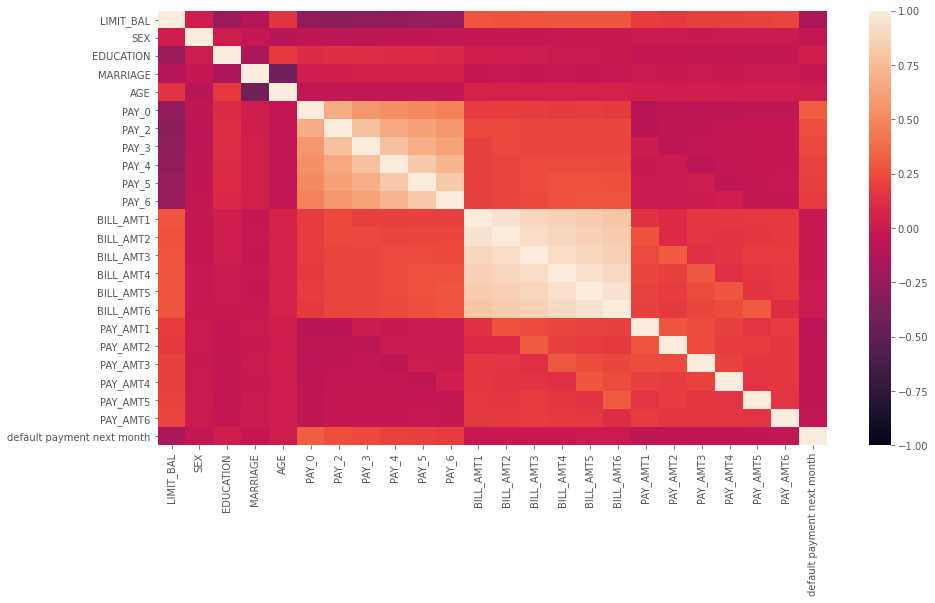

In [161]:
import seaborn as sns
plt.figure(figsize=(15,8))
c= df.corr()
sns.heatmap(c, vmin=-1, vmax=1)

Четко прослеживаются два больших блока, внутри которых все переменные взаимозакоррелированны, возьмём их для факторного анализа (PAY_i и BILL_AMT_i), а также малоинформативные MARRIAGE, AGE, SEX, EDUCATION.

In [176]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df.iloc[:, :-1].values)

In [177]:
#  Перспективы факторного анализа
#  Сравниваем Global KMO с 0.5

print("Global KMO =", kmo_model)

Global KMO = 0.7992715799817969


In [178]:
# посмотрим что говорит критерий
df_1 = df.iloc[:, :-1]
df_2 = pd.DataFrame(data=kmo_all, index = df_1.columns)
df_2.columns = ["kmo"]


In [179]:
df_2

,kmo
LIMIT_BAL,0.911227
SEX,0.595725
EDUCATION,0.662695
MARRIAGE,0.556444
AGE,0.563600
PAY_0,0.918419
PAY_2,0.873471
PAY_3,0.878340
PAY_4,0.878516
PAY_5,0.842892


Критерий подтвердил наши догадки, наиболее целосообразно делать факторный анализ по BILL_AMT_i и PAY_i, остальные признаки, которые мы хотели взять, чуть менее приемлимы, но мы всё равно их возьмём. Также можно взять и LIMIT_BAL.

In [451]:
from sklearn.decomposition import PCA
df_3 = df.iloc[:,:17].values
df_scaled = preprocessing.StandardScaler().fit_transform(df_3)


In [452]:
pca = PCA(n_components=10)

In [469]:
pca.fit(df_scaled)

PCA(n_components=5)

In [470]:
print(pca.explained_variance_ratio_ * df_scaled.shape[1])


[6.36795036 3.75520848 1.51130837 1.02721349 0.96134656]


Вывод: оставим пять кластеров. (>0.8, хотя можно было и четыре)

In [471]:
pca = PCA(n_components=5)
pca.fit(df_scaled)

PCA(n_components=5)

In [472]:
df_to_merge = df.iloc[:,:23]
df_to_merge.reset_index(inplace=True)
df_to_merge= df_to_merge.iloc[:,1:]
df_to_merge

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [473]:
factors_2 = pd.DataFrame(pca.transform(df_scaled), columns = ['F1', 'F2','F3','F4','F5'])

In [474]:
df_full = df_to_merge.merge(factors_2, left_index=True, right_index=True)
 

In [475]:
X = df_full.values  
y = df.iloc[:, 23].values  

In [477]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)  


In [478]:
# Активируем поиск на решетке GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {  
      'n_estimators': [50, 100, 200],
      'max_depth': [3, 5, 8],
      'min_samples_split': [2, 5, 7, 9]
  }

In [479]:
model2 = RandomForestClassifier(random_state=42, class_weight=None)
grid_search_res = GridSearchCV(model2, param_grid=param_grid, cv=2, error_score='raise', 
                               pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [480]:
grid_search_res.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 8],
                         'min_samples_split': [2, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [482]:
best_CV_score = grid_search_res.best_estimator_
test_acc = best_CV_score.score(X_test,y_test)
# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.8135


In [483]:
# Строим предсказание модели
y_pred_train2 = grid_search_res.predict_proba(X_train)
y_pred_test2 = grid_search_res.predict_proba(X_test)
part = sum(np.sum(y_pred_test2>0.8, axis =1))/np.shape(y_pred_test2)[0]*100
print('Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна',part,'%')

Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна 68.60000000000001 %


In [484]:
y_pred_train2 = grid_search_res.predict(X_train)
y_pred_test2 = grid_search_res.predict(X_test)
print(metrics.classification_report(y_pred_test2, y_test))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      5310
           1       0.34      0.69      0.46       690

    accuracy                           0.81      6000
   macro avg       0.65      0.76      0.67      6000
weighted avg       0.88      0.81      0.84      6000



Как видим, результаты практически не изменились, значительных улучшений не замечено.

In [494]:
pd.DataFrame({'feature': df_full.columns,
              'importance': grid_search_res.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
5,PAY_0,0.263916
6,PAY_2,0.117234
24,F2,0.114691
7,PAY_3,0.076734
9,PAY_5,0.042878
23,F1,0.031739
17,PAY_AMT1,0.028935
11,BILL_AMT1,0.026104
10,PAY_6,0.024134
0,LIMIT_BAL,0.022294


Часть переменных стала менее информативной, так как информацию из них вобрали в себя главные компоненты, однако, переменные PAY_i так и остались наиболее информативными, как и до этого. Проверим, насколько изменится качество, если мы возьмём только компоненты и оставшиеся признаки, забыв про остальные. Возьмём лучшую модель.

In [509]:
X = df_full.iloc[:,17:]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)  
grid_search_res.best_estimator_

RandomForestClassifier(max_depth=8, random_state=42)

In [504]:

model = RandomForestClassifier(random_state=42,
                               # число деревьев в лесу
                               n_estimators=200,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # то ли число слоев, то ли число расщеплений  
                               #  ?????????????????  но не число узлов
                               max_depth=8,
                               # сколько переменных использовать при построении дерева?
                               # sqrt(k)
                               max_features='auto', 
                               # максимальное число конечных узлов. Сейчас - без ограничений
                               max_leaf_nodes=None,
                               # минимальное уменьшение загрязнения 
                               min_impurity_decrease=0.0, 
                               # Устарело
                               min_impurity_split=None,
                               # Дерево обучается по части наблюдений (По какой???)
                               bootstrap=True, 
                               # минимальное число наблюдений в узле потомке
                               min_samples_leaf=1, 
                               # минимальное число наблюдений в узле родителе
                               min_samples_split=9,
                               # параметр используется редко, самостоятельно
                               min_weight_fraction_leaf=0.0, 
                               # объем промежуточных результатов в ходе обучения
                               verbose=1, 
                               # число используемых процессоров
                               # n_jobs=None,
                               # Вычислять out-of-bag ошибку
                               oob_score=True,
                               # использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               # веса классов для балансировки обучения
                               class_weight=None)

model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.2s finished


RandomForestClassifier(max_depth=8, min_samples_split=9, n_estimators=200,
                       oob_score=True, random_state=42, verbose=1)

In [505]:
test_acc = model.score(X_test,y_test)
# начение критерия качества для лучших значений гиперпараметров 
print('Лучшее accuracy на тестовом множестве', test_acc)

Лучшее accuracy на тестовом множестве 0.8003333333333333


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


In [507]:
#Строим предсказание модели
y_pred_train2 = model.predict_proba(X_train)
y_pred_test2 = model.predict_proba(X_test)
part = sum(np.sum(y_pred_test2>0.8, axis =1))/np.shape(y_pred_test2)[0]*100
print('Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна',part,'%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Доля наблюдений в тестовой выборке, для которых есть класс, вероятность принадлежать которому больше 0.8 равна 65.38333333333334 %


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished


Как видим, качество лишь незначительно уменьшилось, хотя число переменных уменьшилось больше чем в 2 раза.